In [1]:
import pandas as pd
import numpy as np
import nltk
import string

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df.head()

URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [4]:
len(df)

4009

In [5]:
# type(df['Body'][0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [6]:
df.dropna(subset=['Body'], inplace=True)

In [7]:
df = df.drop(columns=['URLs'], axis=1)
df.head()

Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3988 entries, 0 to 4008
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  3988 non-null   object
 1   Body      3988 non-null   object
 2   Label     3988 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 124.6+ KB


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df['Label'].value_counts()

Label
0    2120
1    1868
Name: count, dtype: int64

In [11]:
df['Headline'][247]

'Financialization and The Destruction of the Real Economy'

In [12]:
df['Headline'] = df['Headline'].str.lower()
df['Body'] = df['Body'].str.lower()
df.head()

Headline  \
0         four ways bob corker skewered donald trump   
1  linklater's war veteran comedy speaks to moder...   
2  trump’s fight with corker jeopardizes his legi...   
3  egypt's cheiron wins tie-up with pemex for mex...   
4        jason aldean opens 'snl' with vegas tribute   

                                                Body  Label  
0  image copyright getty images\non sunday mornin...      1  
1  london (reuters) - “last flag flying”, a comed...      1  
2  the feud broke into public view last week when...      1  
3  mexico city (reuters) - egypt’s cheiron holdin...      1  
4  country singer jason aldean, who was performin...      1

### Removing Punctutations

In [13]:
def remove_punctuations(text):
    punctuations = set(string.punctuation)
    text = str(text)
    # return text.translate(str.maketrans('', '', punctuations))
    return " ".join([word for word in text.split() if word not in punctuations])

In [14]:
df['Headline'] = df['Headline'].apply(lambda x: remove_punctuations(x))
df['Body'] = df['Body'].apply(lambda x: remove_punctuations(x))
df.head()

Headline  \
0         four ways bob corker skewered donald trump   
1  linklater's war veteran comedy speaks to moder...   
2  trump’s fight with corker jeopardizes his legi...   
3  egypt's cheiron wins tie-up with pemex for mex...   
4        jason aldean opens 'snl' with vegas tribute   

                                                Body  Label  
0  image copyright getty images on sunday morning...      1  
1  london (reuters) “last flag flying”, a comedy-...      1  
2  the feud broke into public view last week when...      1  
3  mexico city (reuters) egypt’s cheiron holdings...      1  
4  country singer jason aldean, who was performin...      1

### Removing Stopwords

In [15]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['Headline'] = df['Headline'].apply(lambda x: remove_stopwords(x))
df['Body'] = df['Body'].apply(lambda x: remove_stopwords(x))
df.head()

Headline  \
0         four ways bob corker skewered donald trump   
1  linklater's war veteran comedy speaks modern a...   
2  trump’s fight corker jeopardizes legislative a...   
3  egypt's cheiron wins tie-up pemex mexican onsh...   
4             jason aldean opens 'snl' vegas tribute   

                                                Body  Label  
0  image copyright getty images sunday morning, d...      1  
1  london (reuters) “last flag flying”, comedy-dr...      1  
2  feud broke public view last week mr. corker sa...      1  
3  mexico city (reuters) egypt’s cheiron holdings...      1  
4  country singer jason aldean, performing las ve...      1

### Removing Special Characters

In [16]:
import re
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['Headline'] = df['Headline'].apply(lambda x: remove_spl_chars(x))
df['Body'] = df['Body'].apply(lambda x: remove_spl_chars(x))
df.head()

Headline  \
0         four ways bob corker skewered donald trump   
1  linklater s war veteran comedy speaks modern a...   
2  trump s fight corker jeopardizes legislative a...   
3  egypt s cheiron wins tie up pemex mexican onsh...   
4               jason aldean opens snl vegas tribute   

                                                Body  Label  
0  image copyright getty images sunday morning do...      1  
1  london reuters last flag flying comedy drama v...      1  
2  feud broke public view last week mr corker sai...      1  
3  mexico city reuters egypt s cheiron holdings l...      1  
4  country singer jason aldean performing las veg...      1

### Lemmatization & POS Tagging

In [17]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text):
    # find pos tags
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [18]:
t = pos_tag(["running"])
lemmatizer.lemmatize('ran')

'ran'

In [19]:
df['Headline'] = df['Headline'].apply(lambda x: remove_spl_chars(x))
df['Body'] = df['Body'].apply(lambda x: remove_spl_chars(x))
df.head()

Headline  \
0         four ways bob corker skewered donald trump   
1  linklater s war veteran comedy speaks modern a...   
2  trump s fight corker jeopardizes legislative a...   
3  egypt s cheiron wins tie up pemex mexican onsh...   
4               jason aldean opens snl vegas tribute   

                                                Body  Label  
0  image copyright getty images sunday morning do...      1  
1  london reuters last flag flying comedy drama v...      1  
2  feud broke public view last week mr corker sai...      1  
3  mexico city reuters egypt s cheiron holdings l...      1  
4  country singer jason aldean performing las veg...      1

### Removal of URLs

In [20]:
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

df['Headline'] = df['Headline'].apply(lambda x: remove_spl_chars(x))
df['Body'] = df['Body'].apply(lambda x: remove_spl_chars(x))


In [21]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_text = spell.unknown(text.split())
    # print(misspelled_text)
    for word in text.split():
        if word in misspelled_text:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
            
    return " ".join(corrected_text)


df['Headline'] = df['Headline'].apply(lambda x: remove_spl_chars(x))
df['Body'] = df['Body'].apply(lambda x: remove_spl_chars(x))

In [22]:
from sklearn.model_selection import train_test_split
y_df = df['Label'].values
y_df

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [23]:
x_df = df.drop(columns=['Label'], axis=1)
x_df.head()

Headline  \
0         four ways bob corker skewered donald trump   
1  linklater s war veteran comedy speaks modern a...   
2  trump s fight corker jeopardizes legislative a...   
3  egypt s cheiron wins tie up pemex mexican onsh...   
4               jason aldean opens snl vegas tribute   

                                                Body  
0  image copyright getty images sunday morning do...  
1  london reuters last flag flying comedy drama v...  
2  feud broke public view last week mr corker sai...  
3  mexico city reuters egypt s cheiron holdings l...  
4  country singer jason aldean performing las veg...

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

In [25]:
print(x_train.shape)
y_train.shape

(3190, 2)


(3190,)

## N-Grams Count Feature

In [26]:
from nltk import ngrams
def generate_N_grams(text,ngram):
    words=[word for word in text.split(" ")]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

generate_N_grams("The sun rises in the east", 2)

['The sun', 'sun rises', 'rises in', 'in the', 'the east']

In [27]:
from collections import defaultdict
label_1_head = defaultdict(int)
label_0_head = defaultdict(int)

for text in df[df.Label == 1].Headline:
    for n in range(2, 4):
        for word in generate_N_grams(text, n):
            label_1_head[word] += 1

for text in df[df.Label == 0].Headline:
    for n in range(2, 4):
        for word in generate_N_grams(text, n):
            label_0_head[word] += 1

In [28]:
label_0_head

defaultdict(int,
            {'jetnation fanduel': 4,
             'fanduel league': 4,
             'league week': 4,
             'week 4': 72,
             'jetnation fanduel league': 4,
             'fanduel league week': 4,
             'league week 4': 2,
             'u s': 22,
             's president': 4,
             'president donald': 22,
             'donald trump': 27,
             'trump quietly': 4,
             'quietly signs': 4,
             'signs law': 4,
             'law allow': 4,
             'allow warrantless': 4,
             'warrantless searches': 5,
             'searches parts': 4,
             'parts va': 4,
             'va dc': 4,
             'dc md': 4,
             'u s president': 4,
             's president donald': 4,
             'president donald trump': 22,
             'donald trump quietly': 4,
             'trump quietly signs': 4,
             'quietly signs law': 4,
             'signs law allow': 4,
             'law allow warrantless

In [29]:
label_1_body = defaultdict(int)
label_0_body = defaultdict(int)

for text in df[df.Label == 1].Body:
    for n in range(2, 4):
        for word in generate_N_grams(text, n):
            label_1_body[word] += 1

for text in df[df.Label == 0].Body:
    for n in range(2, 4):
        for word in generate_N_grams(text, n):
            label_0_body[word] += 1

In [30]:
len(label_0_body)

534558

In [31]:
word_map = defaultdict(int)
for text in df['Body']:
    for n in range(2,4):
        for word in generate_N_grams(text, n):
            word_map[word] += 1
        for word in generate_N_grams(text, n):
            # print(word +" for label_0 : "+ str(word_map[word]/label_0_body[word]))
            # print(word +" for label_1 : "+ str(word_map[word]/label_1_body[word]))
            try:
                if (word_map[word]/label_0_body[word]) <= (word_map[word]/label_1_body[word]):
                    print(word +" is a part of fake news.")
            except:
                ZeroDivisionError

huge news is a part of fake news.
time however is a part of fake news.
free worry is a part of fake news.
end it is a part of fake news.
times really is a part of fake news.
know it is a part of fake news.
can t is a part of fake news.
t really is a part of fake news.
short list is a part of fake news.
much like is a part of fake news.
going anywhere is a part of fake news.
he s is a part of fake news.
he ll is a part of fake news.
continue stand is a part of fake news.
stand together is a part of fake news.
lose two is a part of fake news.
could bad is a part of fake news.
feel president is a part of fake news.
come together is a part of fake news.
daily basis is a part of fake news.
among themselves is a part of fake news.
loud clear is a part of fake news.
clear and is a part of fake news.
s more is a part of fake news.
they ve is a part of fake news.
s true is a part of fake news.
time again is a part of fake news.
give way is a part of fake news.
buying it is a part of fake news.


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(2,2))
v.fit(df['Headline'])
vec = v.transform(df['Headline'])

## Sentiment Score

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

def sim_score(text):
    score = sid_obj.polarity_scores(text)
    sim = [score['neg'], score['neu'], score['pos'], score['compound']]
    return sim

df['Vector']= df['Headline'].apply(lambda x: sim_score(x))

df['Vector']

0               [0.0, 1.0, 0.0, 0.0]
1       [0.271, 0.556, 0.174, -0.34]
2       [0.302, 0.698, 0.0, -0.3818]
3          [0.0, 0.73, 0.27, 0.5719]
4               [0.0, 1.0, 0.0, 0.0]
                    ...             
3983    [0.178, 0.822, 0.0, -0.0772]
3984            [0.0, 1.0, 0.0, 0.0]
3985            [0.0, 1.0, 0.0, 0.0]
3986     [0.0, 0.755, 0.245, 0.3818]
3987    [0.344, 0.656, 0.0, -0.4939]
Name: Vector, Length: 3988, dtype: object

In [34]:
df['Vector_B']= df['Body'].apply(lambda x: sim_score(x))
df['Vector_B']


0          [0.114, 0.76, 0.126, 0.58]
1       [0.138, 0.703, 0.159, 0.8522]
2       [0.128, 0.75, 0.122, -0.8479]
3       [0.025, 0.947, 0.028, 0.0516]
4        [0.157, 0.843, 0.0, -0.4767]
                    ...              
3983    [0.234, 0.483, 0.283, 0.1779]
3984    [0.065, 0.753, 0.182, 0.9779]
3985             [0.0, 1.0, 0.0, 0.0]
3986     [0.017, 0.763, 0.22, 0.9912]
3987     [0.098, 0.762, 0.14, 0.9674]
Name: Vector_B, Length: 3988, dtype: object

In [35]:
df['Vector'] = df['Vector'] + df['Vector_B']
df['Vector']

0          [0.0, 1.0, 0.0, 0.0, 0.114, 0.76, 0.126, 0.58]
1       [0.271, 0.556, 0.174, -0.34, 0.138, 0.703, 0.1...
2       [0.302, 0.698, 0.0, -0.3818, 0.128, 0.75, 0.12...
3       [0.0, 0.73, 0.27, 0.5719, 0.025, 0.947, 0.028,...
4        [0.0, 1.0, 0.0, 0.0, 0.157, 0.843, 0.0, -0.4767]
                              ...                        
3983    [0.178, 0.822, 0.0, -0.0772, 0.234, 0.483, 0.2...
3984    [0.0, 1.0, 0.0, 0.0, 0.065, 0.753, 0.182, 0.9779]
3985             [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
3986    [0.0, 0.755, 0.245, 0.3818, 0.017, 0.763, 0.22...
3987    [0.344, 0.656, 0.0, -0.4939, 0.098, 0.762, 0.1...
Name: Vector, Length: 3988, dtype: object

In [36]:
df = df.drop(columns=['Vector_B'])

## Readability

In [37]:
from textstat import textstat as txs

def read_score(text):
    sc = [txs.flesch_kincaid_grade(text), txs.gunning_fog(text), txs.automated_readability_index(text), txs.coleman_liau_index(text),
          txs.linsear_write_formula(text), txs.dale_chall_readability_score(text)]
    return sc

df['read_h'] = df['Headline'].apply(lambda x: read_score(x))
df['read_b'] = df['Body'].apply(lambda x: read_score(x))

In [38]:
df['Vector'] = df['Vector'] + df['read_h'] + df['read_b']
df['Vector'].head()

0    [0.0, 1.0, 0.0, 0.0, 0.114, 0.76, 0.126, 0.58,...
1    [0.271, 0.556, 0.174, -0.34, 0.138, 0.703, 0.1...
2    [0.302, 0.698, 0.0, -0.3818, 0.128, 0.75, 0.12...
3    [0.0, 0.73, 0.27, 0.5719, 0.025, 0.947, 0.028,...
4    [0.0, 1.0, 0.0, 0.0, 0.157, 0.843, 0.0, -0.476...
Name: Vector, dtype: object

## TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
v_tf = TfidfVectorizer()
tf_b = v_tf.fit_transform(df['Body'])
tf_b = tf_b.toarray()

In [40]:
tf_h = v_tf.transform(df['Headline'])
tf_h = tf_h.toarray()
len(tf_h[0])

45973

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing as prep

v1 = tf_h[0]
v2 = tf_b[0]
v1 = prep.normalize([tf_h[0]])
v2 = prep.normalize([tf_b[0]])
cosine_similarity(v1, v2)

array([[0.26653739]])

In [42]:
cos_sim = []
for i in range(3988):
    sim = cosine_similarity([tf_b[i]], [tf_h[i]])
    cos_sim.append(sim[0])
cos_sim

[array([0.26653739]),
 array([0.23394417]),
 array([0.21039682]),
 array([0.44422541]),
 array([0.37573155]),
 array([0.80762418]),
 array([0.28203758]),
 array([0.44259408]),
 array([0.35458869]),
 array([0.6055499]),
 array([0.19766218]),
 array([0.63935548]),
 array([0.31405248]),
 array([0.5014886]),
 array([0.]),
 array([0.1341862]),
 array([0.26123672]),
 array([0.]),
 array([0.]),
 array([0.79321666]),
 array([0.]),
 array([0.]),
 array([0.52073297]),
 array([0.56192244]),
 array([0.]),
 array([0.33129142]),
 array([0.]),
 array([0.]),
 array([0.2463142]),
 array([0.22640188]),
 array([0.6576139]),
 array([0.]),
 array([0.38289473]),
 array([0.13721748]),
 array([0.33732282]),
 array([0.4562498]),
 array([0.37799862]),
 array([0.55196556]),
 array([0.]),
 array([0.48001568]),
 array([0.56416157]),
 array([0.]),
 array([0.45217925]),
 array([0.31522729]),
 array([0.71118292]),
 array([0.]),
 array([0.11593505]),
 array([0.7161516]),
 array([0.76695616]),
 array([0.39531605]),
 ar

In [43]:
df['similarity'] = cos_sim

In [44]:
df['similarity'][0].shape

(1,)

In [45]:
df['Vector'] = df['Vector'] + df['similarity']

## Word Embeddings

In [46]:
import tensorflow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [47]:
tok = Tokenizer()
tok.fit_on_texts(df['Body'])
len(tok.word_index)

46009

In [48]:
max(len(data) for data in df['Headline'])

490

In [49]:
seq = tok.texts_to_sequences(df['Body'])
pad_seq = pad_sequences(seq, maxlen=490, padding='post', truncating='post')

In [50]:
# create embedding index
embedding_index = {}
with open('./glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [51]:
vocab_size = len(tok.word_index)
word_index = tok.word_index
embedding_matrix = np.zeros((vocab_size+1, 50))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [52]:
embedding_matrix.shape

(46010, 50)

In [53]:
import torch
import torchtext

glove = torchtext.vocab.GloVe(name='6B', dim=50)

In [54]:
we_h = []
we_b = []
cos_we = []
def cosine_distance_wordembedding_method(s1, s2):
    vector_1 = np.mean([glove[word] for word in s1],axis=0)
    vector_2 = np.mean([glove[word] for word in s2],axis=0)
    we_h.append(vector_2)
    we_b.append(vector_1)
    sim = cosine_similarity([vector_1], [vector_2])
    cos_we.append(sim[0])

In [55]:
for i in range(3988):
    try:
        cosine_distance_wordembedding_method(df['Body'][i], df['Headline'][i])
    except:
        KeyError
        continue

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Headline    3988 non-null   object
 1   Body        3988 non-null   object
 2   Label       3988 non-null   int64 
 3   Vector      3988 non-null   object
 4   read_h      3988 non-null   object
 5   read_b      3988 non-null   object
 6   similarity  3988 non-null   object
dtypes: int64(1), object(6)
memory usage: 218.2+ KB


In [57]:
we_h[0]

array([-0.1176784 ,  0.77664584,  0.6360734 ,  0.7178485 ,  0.17712171,
        0.03212814,  0.39499182, -0.72467405, -0.18198988, -0.02513162,
       -0.29861113,  0.34147906, -0.28729382, -0.3880506 , -0.25297785,
       -0.19193466, -0.18618427, -0.07918665, -0.2151982 , -0.23616341,
       -0.38378987, -0.280587  ,  0.6710534 ,  0.42574483, -0.24481156,
       -0.45988613, -0.2035375 , -0.12373263, -0.03761382, -0.153703  ,
        1.9814595 , -0.19347294, -0.25253877,  0.47555298,  0.22888209,
       -0.79733133,  0.48903024, -0.49132848,  0.29093432,  0.1494256 ,
        0.6972254 ,  0.18728411, -0.21137857, -0.07073519, -0.17002648,
        0.34196177,  0.16898029, -0.35182709,  0.2782298 ,  1.0556101 ],
      dtype=float32)

In [58]:
df['we_h'] = we_h
df['we_b'] = we_b
df['sim'] = cos_we

In [59]:
df['we_h'][0].shape

(50,)

In [60]:
type(df['Vector'])

pandas.core.series.Series

In [61]:
df['Vector'] = df['Vector'] + df['sim']

In [62]:
df['Vector'][1].shape

(20,)

In [63]:
v1 = df['Vector'][0]
v2 = df['we_b'][0]

v1 = np.hstack((v1, v2))

In [ ]:
for i in range(4009):
    try:
        df['Vector'][i] = np.hstack((df['Vector'][i], df['we_h'][i]))
        df['Vector'][i] = np.hstack((df['Vector'][i], df['we_b'][i]))
    except:
        KeyError
        continue

In [65]:
df['Vector'][0].shape

(120,)

## Model Building

In [66]:
x_df = df['Vector']
y_df = df['Label']
x_df.head()
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=10, stratify=y_df)

In [67]:
len(x_train), len(y_train)

(3190, 3190)

In [68]:
X_train = []
for l in x_train:
    s = []
    for data in l:
        s.append(float(data))
    X_train.append(s)

In [69]:
X_test = []
for l in x_test:
    s = []
    for data in l:
        s.append(float(data))
    X_test.append(s)

In [70]:
X_train = np.array(X_train)

In [71]:
type(X_train[0]), type(y_train[0])

(numpy.ndarray, numpy.int64)

In [72]:
len(x_test), len(y_test)

(798, 798)

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = rf.predict(X_test)
y_pred.shape

(798,)

In [76]:
score = accuracy_score(y_pred, y_test)
score

0.8696741854636592

### XG Boost

In [77]:
from xgboost import XGBClassifier
clf_xg = XGBClassifier()

In [78]:
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
y_pred = clf_xg.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.8796992481203008

### SVC

In [80]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC(verbose=0)

In [81]:
clf_svc.fit(X_train, y_train)

d:\Research Projects\res\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Research Projects\res\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [82]:
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.6140350877192983

### Gaussian NB

In [83]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()

In [84]:
clf_nb.fit(X_train, y_train)

GaussianNB()

In [85]:
y_pred = clf_nb.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.7030075187969925

### AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
clf_ad = AdaBoostClassifier()

In [87]:
clf_ad.fit(X_train, y_train)

AdaBoostClassifier()

In [88]:
y_pred = clf_ad.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.8145363408521303

In [89]:
x_pred = clf_ad.predict(X_train)
score = accuracy_score(x_pred, y_train)
score

0.8689655172413793

### KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

In [91]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred = clf_knn.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.6917293233082706

In [93]:
x_pred = clf_knn.predict(X_train)
score = accuracy_score(x_pred, y_train)
score

0.8137931034482758

### MLP

In [94]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(15,15),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [95]:
clf_mlp.fit(X_train, y_train)

Iteration 1, loss = 1.25429992
Iteration 2, loss = 0.66933729
Iteration 3, loss = 0.64878983
Iteration 4, loss = 0.63915527
Iteration 5, loss = 0.62282829
Iteration 6, loss = 0.61233342
Iteration 7, loss = 0.60895350
Iteration 8, loss = 0.61340759
Iteration 9, loss = 0.60515675
Iteration 10, loss = 0.60449467
Iteration 11, loss = 0.68051072
Iteration 12, loss = 0.64327310
Iteration 13, loss = 0.59207063
Iteration 14, loss = 0.59196641
Iteration 15, loss = 0.57700999
Iteration 16, loss = 0.57023258
Iteration 17, loss = 0.57057332
Iteration 18, loss = 0.56484892
Iteration 19, loss = 0.59094706
Iteration 20, loss = 0.64320825
Iteration 21, loss = 0.61612012
Iteration 22, loss = 0.64699782
Iteration 23, loss = 0.58881755
Iteration 24, loss = 0.55138546
Iteration 25, loss = 0.55355370
Iteration 26, loss = 0.54590761
Iteration 27, loss = 0.54577302
Iteration 28, loss = 0.53506587
Iteration 29, loss = 0.54332073
Iteration 30, loss = 0.54232224
Iteration 31, loss = 0.55701598
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(15, 15), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [96]:
x_pred = clf_mlp.predict(X_train)
score = accuracy_score(x_pred, y_train)
score

0.8100313479623824

In [97]:
y_pred = clf_mlp.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.7857142857142857

## K-fold Cross Validation

In [98]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [99]:
X_df = []
for l in x_df:
    s = []
    for data in l:
        s.append(float(data))
    X_df.append(s)


In [100]:
def get_score(model, x_tr, x_te, y_tr, y_te):
    model.fit(x_tr, y_tr)
    return model.score(x_te, y_te)

In [101]:
from sklearn.model_selection import GroupKFold, StratifiedKFold
gkf = GroupKFold()
skf =  StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [102]:
data = {'Vector':X_df, 'Labels':y_df}
new_df = pd.DataFrame(data)

In [103]:
score_xg = []
score_rf = []
score_svc = []
score_gnb = []
score_ab = []
score_knn = []
score_mlp = []

In [104]:
X_df = np.array(X_df)

In [105]:
x_df[0].shape

(120,)

In [ ]:
for train_idx, test_idx in skf.split(X_df, y_df):
    x_tr, y_tr = X_df[train_idx], y_df.loc[train_idx]
    x_te, y_te = X_df[test_idx], y_df.loc[test_idx]
    score_xg.append(get_score(clf_xg, x_tr, x_te, y_tr, y_te))
    score_svc.append(get_score(clf_svc, x_tr, x_te, y_tr, y_te))
    score_gnb.append(get_score(clf_nb, x_tr, x_te, y_tr, y_te))
    score_ab.append(get_score(clf_ad, x_tr, x_te, y_tr, y_te))
    score_knn.append(get_score(clf_knn, x_tr, x_te, y_tr, y_te))
    score_mlp.append(get_score(clf_mlp, x_tr, x_te, y_tr, y_te))
    score_rf.append(get_score(rf, x_tr, x_te, y_tr, y_te))

In [107]:
print("XGB: ", max(score_xg))
print("Random Forest: ", max(score_rf))
print("SVC: ", max(score_svc))
print("GNB: ", max(score_gnb))
print("Ada Boost: ", max(score_ab))
print("KNN: ", max(score_knn))
print("MLP: ", max(score_mlp))


XGB:  0.9109159347553325
Random Forest:  0.9047619047619048
SVC:  0.739021329987453
GNB:  0.7239648682559598
Ada Boost:  0.8471177944862155
KNN:  0.7619047619047619
MLP:  0.7907268170426065


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier

# Replace the following with your dataset and features
X = X_df
y = y_df

# Number of folds for cross-validation
num_folds = range(2, 10)  # Vary the number of folds from 2 to 10

# Initialize an empty list to store mean accuracies for each fold

model_list = [clf_xg, clf_svc, clf_nb, clf_ad, clf_knn, clf_mlp, rf]
model_score = {}
model_names = ['XGB', 'SVC', 'NB', 'ADB', 'KNN', 'MLP', 'RF']
# Iterate through different numbers of folds
count = 0
for model in model_list:
    mean_accuracies = []
    for folds in num_folds:
        # Create a KFold cross-validation object
        kfold = KFold(n_splits=folds, shuffle=True, random_state=42)

        # Replace RandomForestClassifier with your chosen classifier
        # model = RandomForestClassifier()
        
        
        # Perform cross-validation and get accuracy scores
        
    
        scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        mean_accuracies.append(np.mean(scores))
    model_score[model_names[count]] = mean_accuracies
    count += 1

    # Calculate and store the mean accuracy for this fold
    # mean_accuracies.append(np.mean(scores))

# Plotting the graph
# plt.plot(num_folds, mean_accuracies, marker='o')
# plt.title('Accuracy vs Number of Folds in Cross-Validation')
# plt.xlabel('Number of Folds')
# plt.ylabel('Mean Accuracy')
# plt.show()


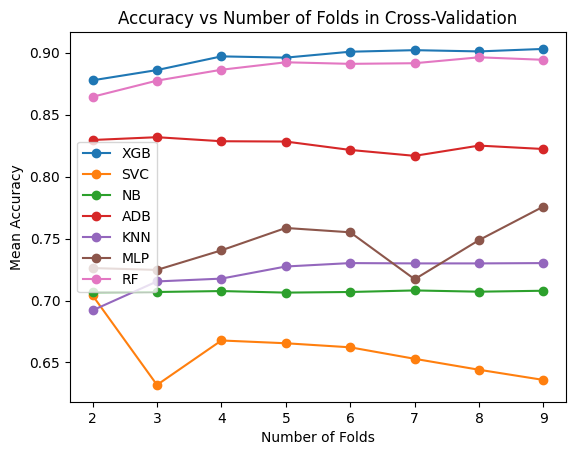

In [146]:
i = 0
for model in model_list:
    plt.plot(num_folds, model_score[model_names[i]], marker='o')
    i += 1
plt.title('Accuracy vs Number of Folds in Cross-Validation')
plt.legend(model_names, loc='best')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Accuracy')
plt.show()